# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv"
)

In [9]:
df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


<IPython.core.display.Javascript object>

In [10]:
# group one was the largest group with 200 records
df.group.value_counts()

1    200
3    100
2    100
Name: group, dtype: int64

<IPython.core.display.Javascript object>

# Significant difference between time 1 and time 2?

In [3]:
# separate dataframes for each group
group1 = df[df.group == 1]
group2 = df[df.group == 2]
group3 = df[df.group == 3]

## Group 1

In [70]:
# kurtosis value 1
print(stats.describe(group1.t1))
# kurtosis value 2
print(stats.describe(group1.t2))

DescribeResult(nobs=200, minmax=(1280, 7646), mean=4525.825, variance=1116111.8737437185, skewness=0.10470680855827937, kurtosis=-0.15125820641729115)
DescribeResult(nobs=200, minmax=(1309, 6979), mean=4539.895, variance=1019194.8482160803, skewness=-0.16385989729839762, kurtosis=-0.1760088854673958)


<IPython.core.display.Javascript object>

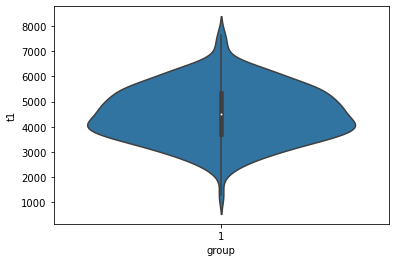

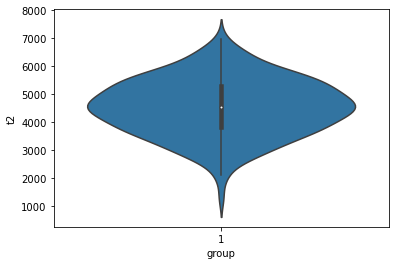

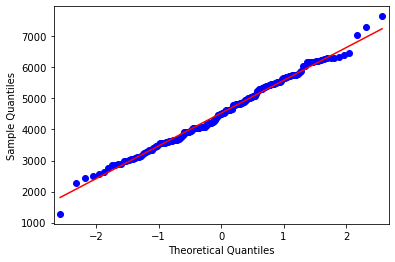

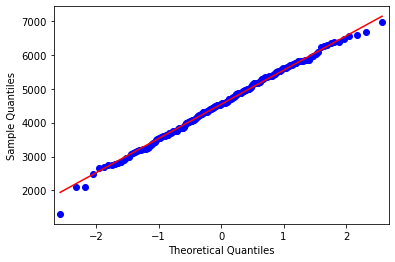

<IPython.core.display.Javascript object>

In [67]:
# group t1 normality tests
qqplot(group1.t1, line="s")
plt.show()

qqplot(group1.t2, line="s")
plt.show()

In [81]:
# not a significant difference between t1/t2 in group 1
tval1, p1 = stats.ttest_rel(group1.t1, group1.t2)
print("t1: ", str(tval1))
print("p1: ", str(p1))

t1:  -0.31827677584963787
p1:  0.7506087664956842


<IPython.core.display.Javascript object>

In [ ]:
stats.ttest_rel()

## Group 2

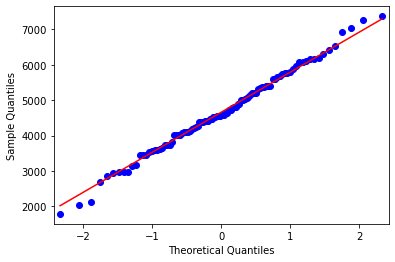

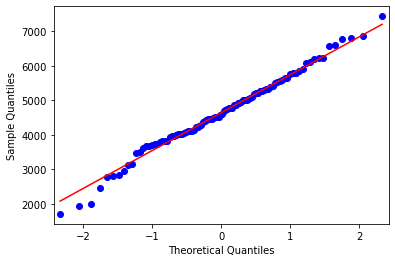

<IPython.core.display.Javascript object>

In [73]:
# group 2 normality tests
qqplot(group2.t1, line="s")
plt.show()

qqplot(group2.t2, line="s")
plt.show()

In [82]:
# not a significant difference between t1/t2 in group 2
tval2, p2 = stats.ttest_rel(group2.t1, group2.t2)
print("t2: ", str(tval2))
print("p2: ", str(p2))

t2:  0.32745622415118286
p2:  0.7440142766032991


<IPython.core.display.Javascript object>

## Group 3

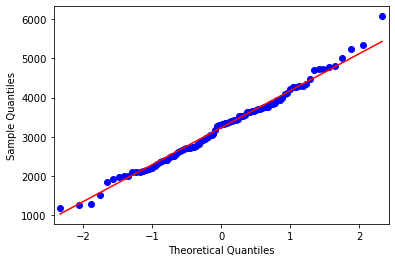

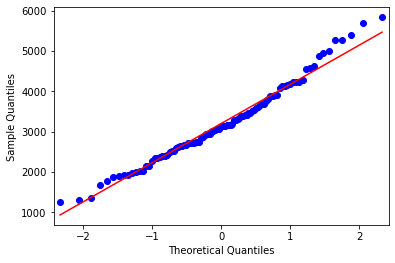

<IPython.core.display.Javascript object>

In [75]:
# group 3 normality tests
qqplot(group3.t1, line="s")
plt.show()

qqplot(group3.t2, line="s")
plt.show()

In [83]:
# not a significant difference between t1/t2 in group 2
tval3, p3 = stats.ttest_rel(group3.t1, group3.t2)
print("t3: ", str(tval3))
print("p3: ", str(p3))

t3:  0.8984773127301627
p3:  0.37111115842334486


<IPython.core.display.Javascript object>

## Assumptions
1. Normality
2. Variance
3. Continuous

### Normality Tests

In [11]:
# separate dataframes for each group
group1 = df[df.group == 1]
group2 = df[df.group == 2]
group3 = df[df.group == 3]

<IPython.core.display.Javascript object>

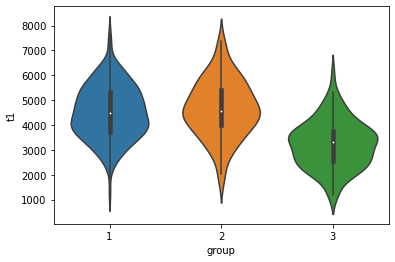

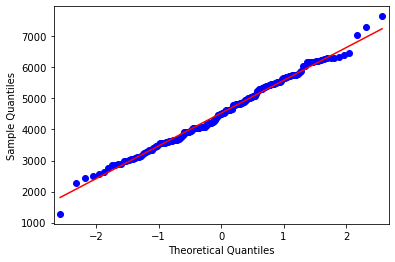

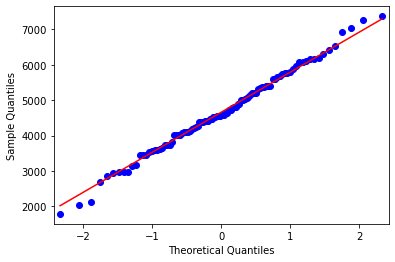

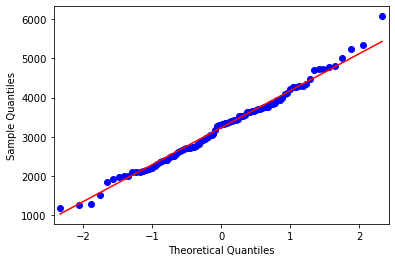

<IPython.core.display.Javascript object>

In [50]:
#  violin plots for t1 for each group
sns.violinplot("group", "t1", data=df)
plt.show()

# group t1 normality tests
qqplot(group1.t1, line="s")
plt.show()

qqplot(group2.t1, line="s")
plt.show()

qqplot(group3.t1, line="s")
plt.show()

### Variance Tests

In [51]:
# standard deviations for each group
df.groupby("group").t1.std()

group
1    1056.461960
2    1138.437508
3     947.057022
Name: t1, dtype: float64

<IPython.core.display.Javascript object>

In [34]:
# bartlett test for the variance of each population of t1
test_stat1, p1 = stats.bartlett(group1.t1, group2.t1, group3.t1)
test_stat1

3.3378956939297786

<IPython.core.display.Javascript object>

In [35]:
# similar population variance in t1 groups
p1 < 0.05

False

<IPython.core.display.Javascript object>

## ANOVA test

In [42]:
# 2 of the null hypotheses were rejects and one was not
tukey_results1 = pairwise_tukeyhsd(df.t1, df.group)
print(tukey_results1.reject)
print(tukey_results1.pvalues)

[False  True  True]
[0.55884575 0.001      0.001     ]


<IPython.core.display.Javascript object>

In [43]:
tukey_results1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,131.775,0.5588,-171.2935,434.8435,False
1,3,-1291.085,0.001,-1594.1535,-988.0165,True
2,3,-1422.86,0.001,-1772.8134,-1072.9066,True


<IPython.core.display.Javascript object>

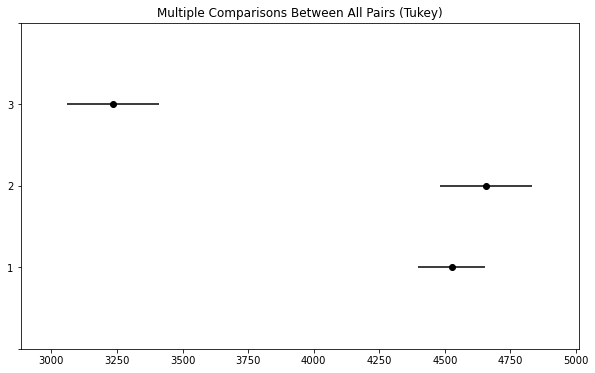

<IPython.core.display.Javascript object>

In [45]:
# there is a statistically significant difference in the means of group 3 and groups1/2
tukey_results1.plot_simultaneous()
plt.show()

# Is there a significant difference in the mean of all groups at time 2?

## Assumptions tests

### Normality

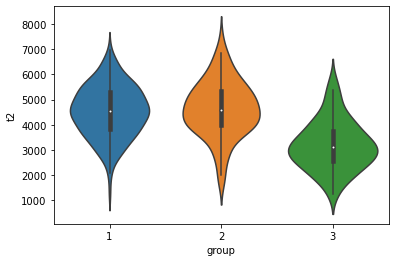

<IPython.core.display.Javascript object>

In [46]:
#  violin plots for t2 of each group
sns.violinplot("group", "t2", data=df)

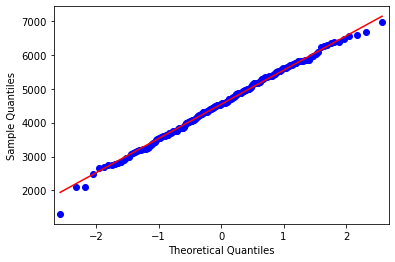

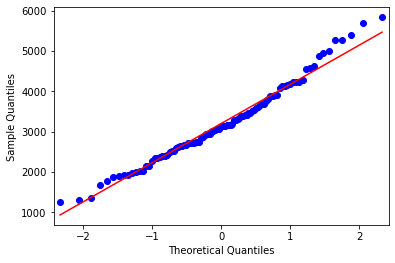

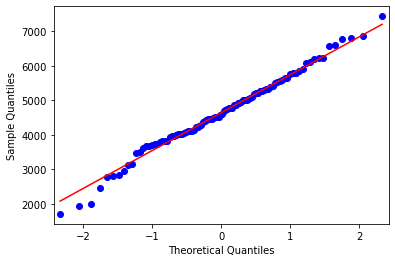

<IPython.core.display.Javascript object>

In [47]:
# group t2 normality tests
qqplot(group1.t2, line="s")
plt.show()

qqplot(group3.t2, line="s")
plt.show()

qqplot(group2.t2, line="s")
plt.show()

### Variance tests

In [52]:
# group standard deviations for t2
df.groupby("group").t2.std()

group
1    1009.551806
2    1102.774920
3     978.563970
Name: t2, dtype: float64

<IPython.core.display.Javascript object>

In [53]:
# bartlett test for the variance of each population of t2
test_stat2, p2 = stats.bartlett(group1.t2, group2.t2, group3.t2)
test_stat2

1.6092346661943888

<IPython.core.display.Javascript object>

In [54]:
# similar population variance in t2 groups
p2 < 0.05

False

<IPython.core.display.Javascript object>

## ANOVA tests

In [77]:
#  variance between groups & variance within groups
#  signal = between groups
#  noise = within groups

f, p = stats.f_oneway(group1.t2, group2.t2, group3.t2)
print(f)
p
# mean is not the same for all groups. At least one mean is different.

67.65846945026495


5.1893599904179e-26

<IPython.core.display.Javascript object>

In [55]:
# 2 of the nulls were rejected and 1 was not
tukey_results2 = pairwise_tukeyhsd(df.t2, df.group)
print(tukey_results2.reject)
print(tukey_results2.pvalues)

[False  True  True]
[0.69019085 0.001      0.001     ]


<IPython.core.display.Javascript object>

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper    reject
-----------------------------------------------------------
     1      2    99.705 0.6902  -195.9612   395.3712  False
     1      3 -1341.865  0.001 -1637.5312 -1046.1988   True
     2      3  -1441.57  0.001 -1782.9759 -1100.1641   True
-----------------------------------------------------------


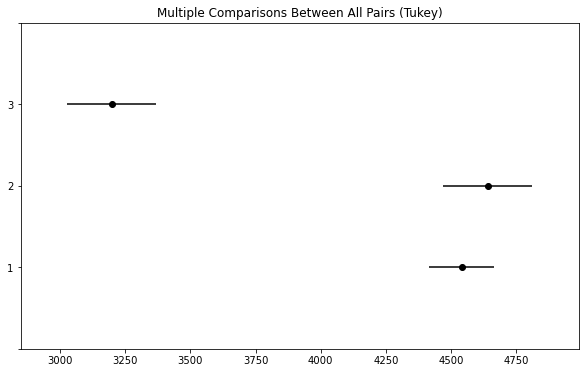

<IPython.core.display.Javascript object>

In [61]:
# results summary table
print(tukey_results2.summary())

# the differences in group 3 vs. groups1/2 were statistically significant
tukey_results2.plot_simultaneous()
plt.show()